![Amazon Logo](https://www.logo.wine/a/logo/Amazon_(company)/Amazon_(company)-Logo.wine.svg)

**GIỚI THIỆU**

Amazon.com, Inc. (Amazon) là một công ty thiết kế, sản xuất và tiếp thị các sản phẩm điện tử, bao gồm thiết bị đọc sách điện tử, đồ gia dụng thông minh và thiết bị lưu trữ dữ liệu. Công ty cũng cung cấp các dịch vụ điện toán đám mây, giải pháp truyền thông số và các sản phẩm và dịch vụ liên quan. Danh mục sản phẩm của Amazon bao gồm các thiết bị Kindle, Echo, Fire TV và Ring. Amazon cũng cung cấp dịch vụ hệ điều hành Fire OS cho các thiết bị Kindle và Fire TV, cùng với các dịch vụ đám mây như Amazon Web Services (AWS), Amazon Prime, và Amazon Music. Amazon bán các sản phẩm và dịch vụ của mình thông qua trang web bán lẻ trực tuyến chính thức của mình, cùng với các ứng dụng di động và nền tảng thương mại điện tử. Công ty có hoạt động kinh doanh trên toàn cầu, phục vụ khách hàng ở nhiều khu vực trên thế giới.Amazon có trụ sở tại Seattle, Washington, Hoa Kỳ.

Trong đoạn code sau, chúng em đã thực hiện Trực quan hóa Dữ liệu và Phân tích Giá cổ phiếu của Công ty Amazon. Hiển thị khi giá cả tăng hoặc giảm, tương quan giữa các giá trị và các thông tin hữu ích khác. Trong quá trình này, chúng em sử dụng các thư viện kỹ thuật như Pandas, NumPy, Matplotlib và Seaborn.

**Import Thư Viện**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Đọc Dataset**

In [2]:
AMZN = pd.read_csv('./dataset/amzn_raw_data.csv')

**Thông Tin Cơ Bản về Dataset**

In [3]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            6717 non-null   object 
 1   open            6717 non-null   float64
 2   high            6717 non-null   float64
 3   low             6717 non-null   float64
 4   close           6717 non-null   float64
 5   volume          6717 non-null   int64  
 6   adjusted_close  6717 non-null   float64
 7   change_percent  6716 non-null   float64
 8   avg_vol_20d     6698 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 472.4+ KB


In [4]:
# Kiểm Tra Các Cột
AMZN.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'adjusted_close',
       'change_percent', 'avg_vol_20d'],
      dtype='object')

In [5]:
# Kiểm Tra số lượng các cột và hàng
AMZN.shape

(6717, 9)

In [6]:
# Hiển thị 10 hàng đầu tiên
AMZN[0:10]

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,1997-05-15,29.256,30.000,23.136,23.496,6013000,0.0979,NaN,NaN
1,1997-05-16,23.616,23.760,20.496,20.760,1225000,0.0865,-11.64,NaN
2,1997-05-19,21.120,21.240,19.488,20.496,508900,0.0854,-1.27,NaN
3,1997-05-20,20.760,21.000,19.632,19.632,455600,0.0818,-4.22,NaN
4,1997-05-21,19.632,19.752,16.512,17.136,1571100,0.0714,-12.71,NaN
5,1997-05-22,17.256,17.376,15.744,16.752,981400,0.0698,-2.24,NaN
6,1997-05-23,16.872,18.240,16.008,18.000,1328100,0.0750,7.45,NaN
7,1997-05-27,18.120,19.752,17.496,19.008,724800,0.0792,5.60,NaN
8,1997-05-28,19.488,19.632,18.384,18.384,381200,0.0766,-3.28,NaN
9,1997-05-29,18.504,18.504,17.760,18.072,289400,0.0753,-1.70,NaN


In [7]:
# hiển thị các hàng cuối
AMZN.tail()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
6712,2024-01-18,152.77,153.78,151.82,153.50,37850200,153.50,1.18,40963465.0
6713,2024-01-19,153.83,155.76,152.74,155.34,51033700,155.34,1.20,41356585.0
6714,2024-01-22,156.89,157.05,153.90,154.78,43687500,154.78,-0.36,41024855.0
6715,2024-01-23,154.85,156.21,153.93,156.02,37986000,156.02,0.80,41108870.0
6716,2024-01-24,157.80,158.51,156.48,156.87,48466900,156.87,0.54,42058210.0


In [8]:
# Kiểm tra số lượng giá trị null
AMZN.isnull().sum()

date               0
open               0
high               0
low                0
close              0
volume             0
adjusted_close     0
change_percent     1
avg_vol_20d       19
dtype: int64

In [9]:
(AMZN.isnull().sum()).values

array([ 0,  0,  0,  0,  0,  0,  0,  1, 19], dtype=int64)

In [10]:
# Drop các hàng null nếu có
AMZN_u = AMZN.dropna(how="all")
AMZN_u

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,1997-05-15,29.256,30.000,23.136,23.496,6013000,0.0979,NaN,NaN
1,1997-05-16,23.616,23.760,20.496,20.760,1225000,0.0865,-11.64,NaN
2,1997-05-19,21.120,21.240,19.488,20.496,508900,0.0854,-1.27,NaN
3,1997-05-20,20.760,21.000,19.632,19.632,455600,0.0818,-4.22,NaN
4,1997-05-21,19.632,19.752,16.512,17.136,1571100,0.0714,-12.71,NaN
...,...,...,...,...,...,...,...,...,...
6712,2024-01-18,152.770,153.780,151.820,153.500,37850200,153.5000,1.18,40963465.0
6713,2024-01-19,153.830,155.760,152.740,155.340,51033700,155.3400,1.20,41356585.0
6714,2024-01-22,156.890,157.050,153.900,154.780,43687500,154.7800,-0.36,41024855.0
6715,2024-01-23,154.850,156.210,153.930,156.020,37986000,156.0200,0.80,41108870.0


**TRỰC QUAN HÓA**

In [11]:
# Lấy tập dữ liệu từ năm 2011 đến năm 2023
AMZN_11_23 = AMZN_u[(AMZN_u['date'] >= '2011-01-01') & (AMZN_u['date'] <= '2023-12-31')]

************************************************
 3025600     3
4865900     3
2913600     3
4430800     2
2704400     2
           ..
2020600     1
2244200     1
2231100     1
1912400     1
39789000    1
Name: volume, Length: 3201, dtype: int64 
************************************************


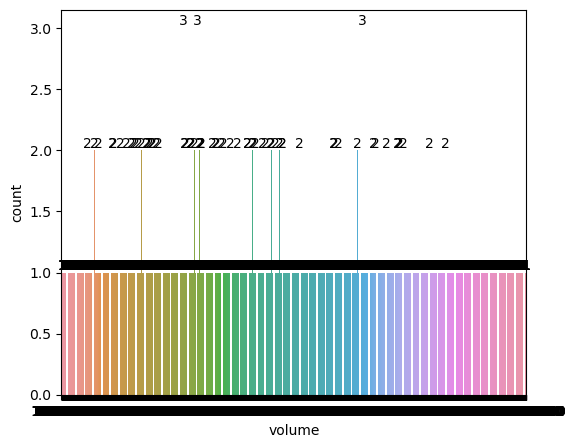

In [12]:
print('************************************************\n',AMZN_11_23['volume'].value_counts(), '\n************************************************')
plt.figure(figsize=(6,5))

ax = sns.countplot(data=AMZN_11_23, x='volume')
ax.bar_label(ax.containers[0])
plt.show()

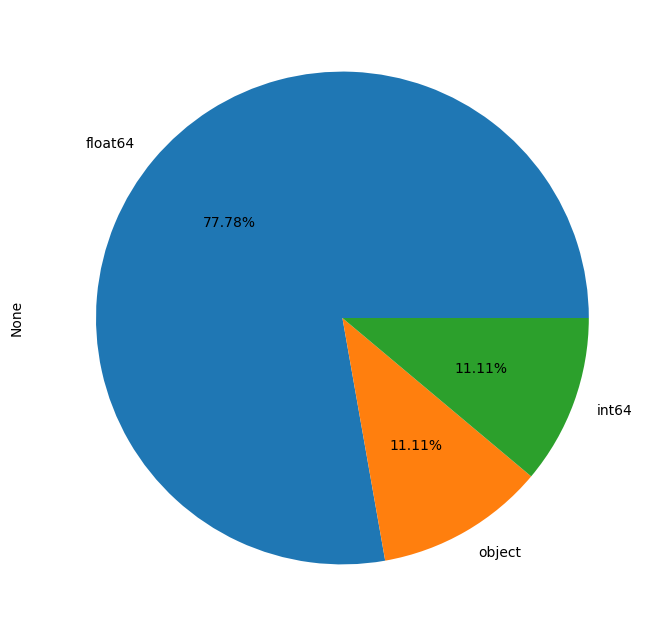

In [13]:
plt.figure(figsize=(8,8))
AMZN_11_23.dtypes.value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

3270

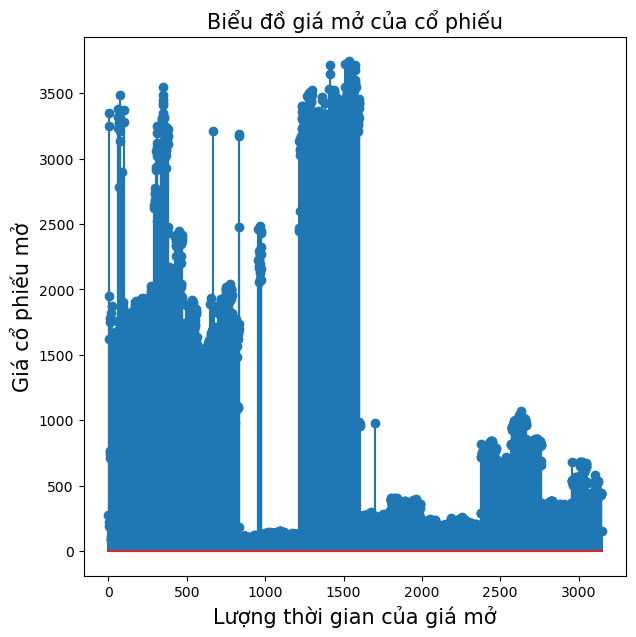

In [14]:
# Hiển thị giá trị tăng và giảm thông qua biểu đồ stem
plt.figure(figsize=(7,7))
plt.stem(list(AMZN_11_23['open'].value_counts().keys()))
plt.xlabel("Lượng thời gian của giá mở", fontsize=15)
plt.ylabel("Giá cổ phiếu mở", fontsize=15)
plt.title("Biểu đồ giá mở của cổ phiếu", fontsize=15)
plt.show
(AMZN_11_23['open'].value_counts()).sum()

3270

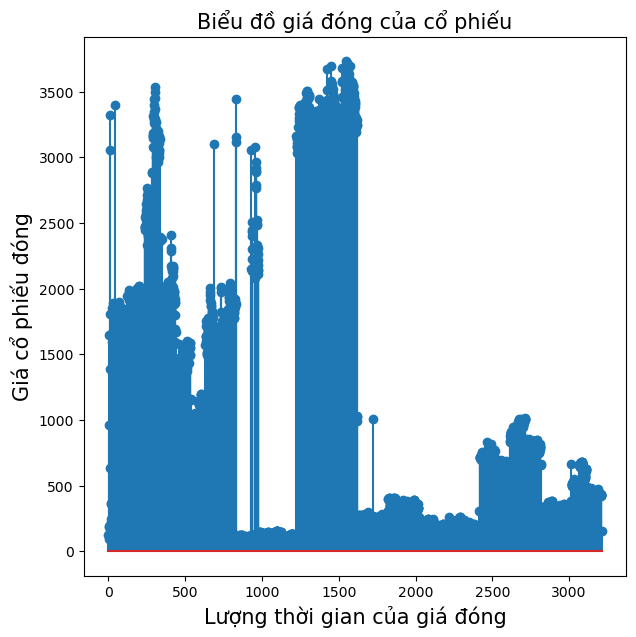

In [15]:
# Thể hiện sự tăng giảm của giá trị thông qua biểu đồ stem
plt.figure(figsize=(7,7))
plt.stem(list(AMZN_11_23['close'].value_counts().keys()))
plt.xlabel("Lượng thời gian của giá đóng", fontsize=15)
plt.ylabel("Giá cổ phiếu đóng", fontsize=15)
plt.title("Biểu đồ giá đóng của cổ phiếu", fontsize=15)
plt.show
(AMZN_11_23['close'].value_counts()).sum()

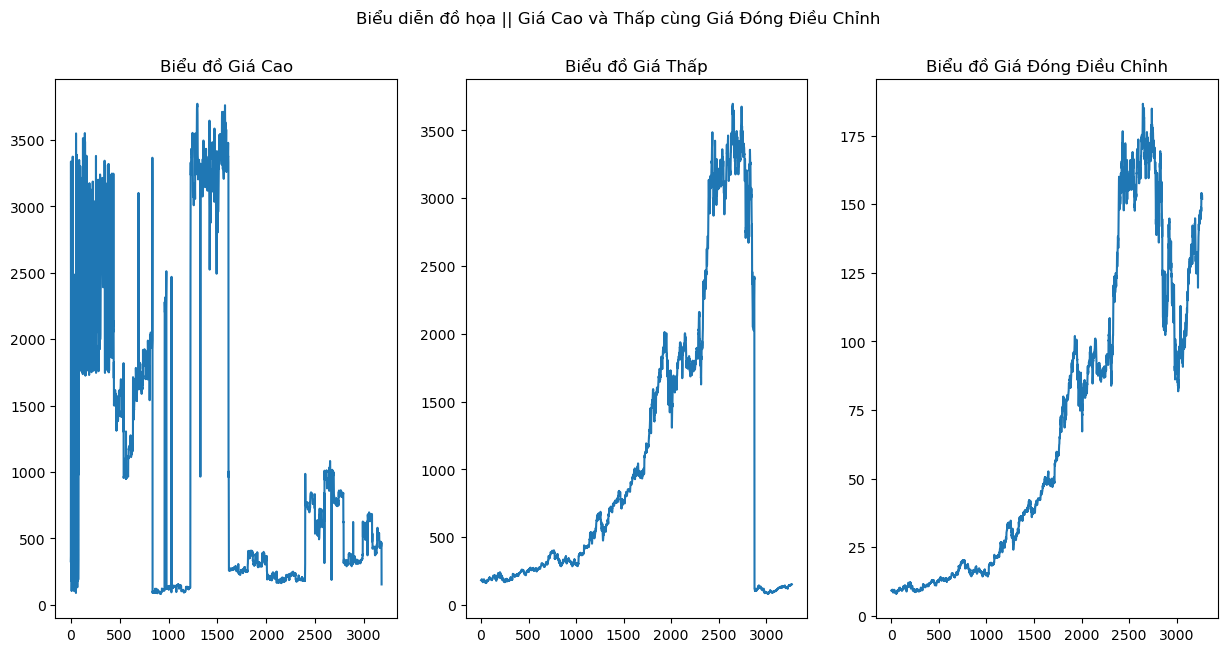

In [16]:
# Những đồ thị này thể hiện sự lên xuống của giá trị
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.plot(list(AMZN_11_23['high'].value_counts().keys()))
plt.title("Biểu đồ Giá Cao")
plt.subplot(132)
plt.plot(list(AMZN_11_23['low']))
plt.title("Biểu đồ Giá Thấp")
plt.subplot(133)
plt.plot(list(AMZN_11_23['adjusted_close']))
plt.title("Biểu đồ Giá Đóng Điều Chỉnh")
plt.suptitle("Biểu diễn đồ họa || Giá Cao và Thấp cùng Giá Đóng Điều Chỉnh")
#******************plt.supylabel("Giá Cổ Phiếu")
#******************plt.supxlabel("Thời Điểm (Số Lượng)")
plt.show()

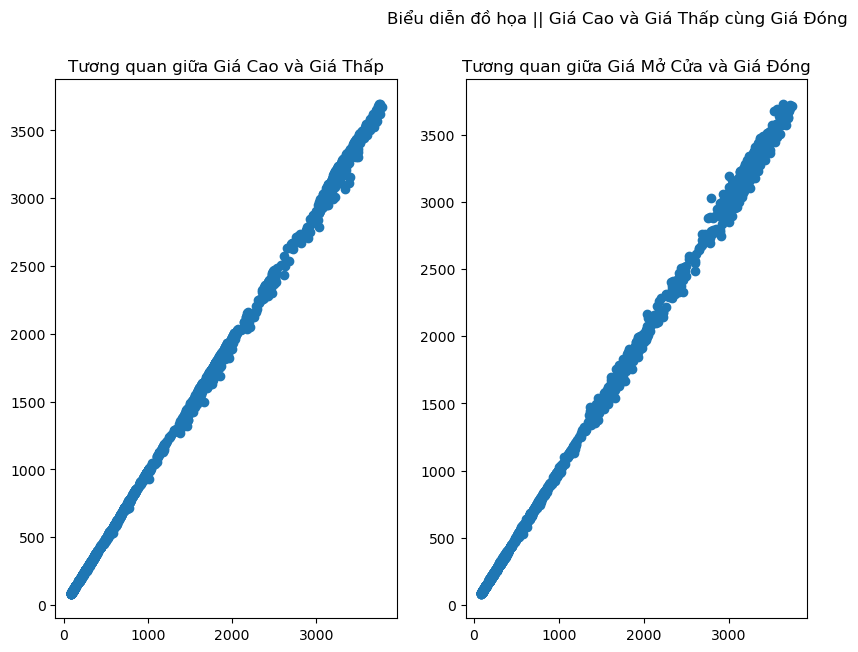

In [17]:
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.scatter(list(AMZN_11_23['high']), list(AMZN_11_23['low']))
plt.title("Tương quan giữa Giá Cao và Giá Thấp")
plt.subplot(132)
plt.scatter(list(AMZN_11_23['open']), AMZN_11_23['close'])
plt.title("Tương quan giữa Giá Mở Cửa và Giá Đóng")
plt.suptitle("Biểu diễn đồ họa || Giá Cao và Giá Thấp cùng Giá Đóng")
#******************plt.supylabel("Giá Cổ Phiếu")
#******************plt.supxlabel("Thời Điểm (Số Lượng)")
plt.show()

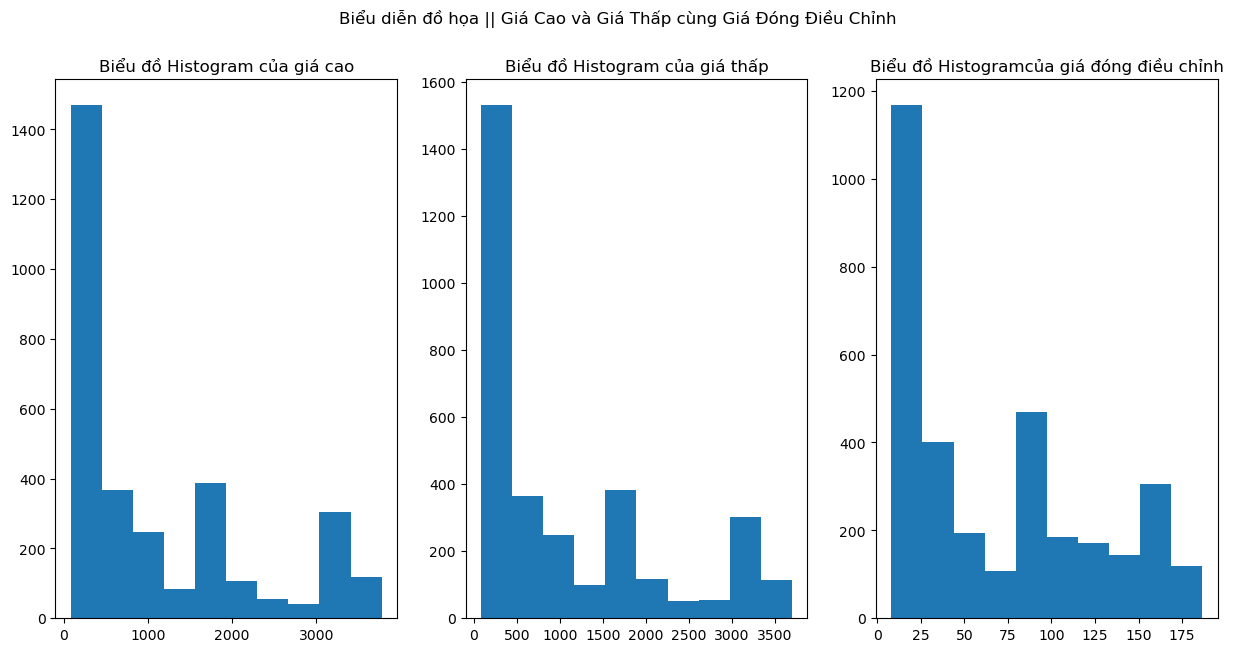

In [18]:
#Những biểu đồ này hiển thị các khoảng giá trị
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.hist(list(AMZN_11_23['high'].value_counts().keys()))
plt.title("Biểu đồ Histogram của giá cao")
plt.subplot(132)
plt.hist(list(AMZN_11_23['low']))
plt.title("Biểu đồ Histogram của giá thấp")
plt.subplot(133)
plt.hist(list(AMZN_11_23['adjusted_close']))
plt.title("Biểu đồ Histogramcủa giá đóng điều chỉnh")
plt.suptitle("Biểu diễn đồ họa || Giá Cao và Giá Thấp cùng Giá Đóng Điều Chỉnh")
#******************plt.supylabel("Giá Cổ Phiếu")
#******************plt.supxlabel("Thời Điểm (Số Lượng)")
plt.show()

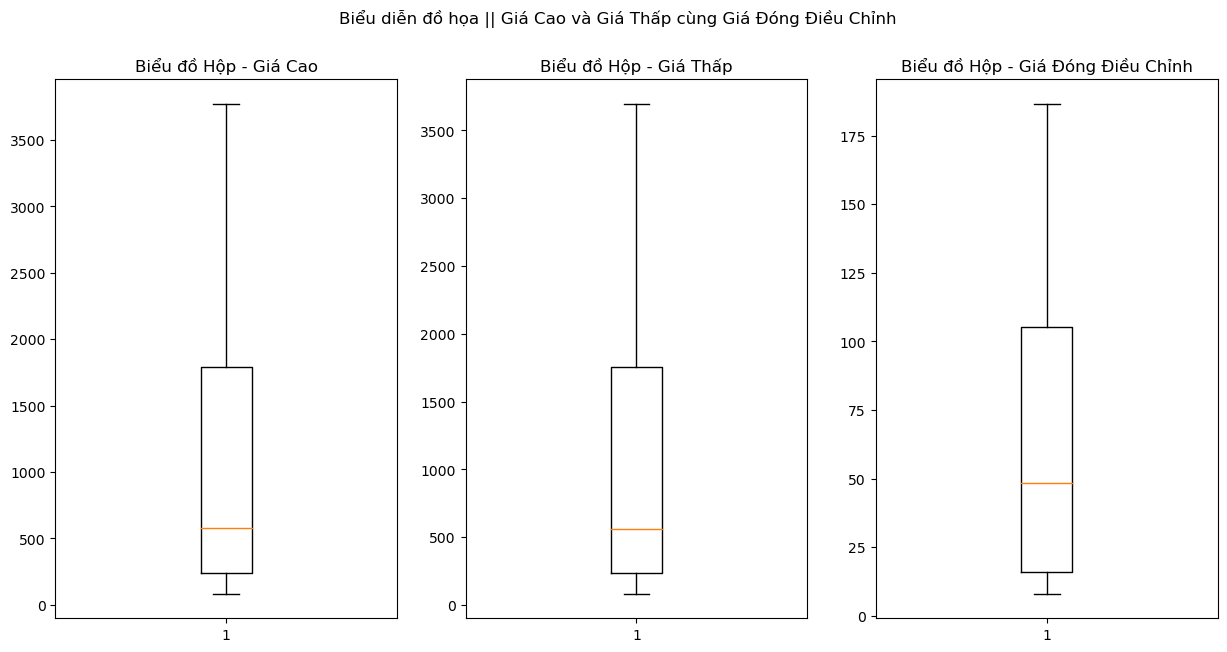

In [19]:
# Tạo một hình vẽ với kích thước 15x7 inch
plt.figure(figsize=(15, 7))

# Biểu đồ hộp cho giá cao (high)
plt.subplot(131)
plt.boxplot(list(AMZN_11_23['high']))
plt.title("Biểu đồ Hộp - Giá Cao")

# Biểu đồ hộp cho giá thấp (low)
plt.subplot(132)
plt.boxplot(list(AMZN_11_23['low']))
plt.title("Biểu đồ Hộp - Giá Thấp")

# Biểu đồ hộp cho giá đóng cửa điều chỉnh (adjusted_close)
plt.subplot(133)
plt.boxplot(list(AMZN_11_23['adjusted_close']))
plt.title("Biểu đồ Hộp - Giá Đóng Điều Chỉnh")

# Tiêu đề chính của toàn bộ biểu đồ
plt.suptitle("Biểu diễn đồ họa || Giá Cao và Giá Thấp cùng Giá Đóng Điều Chỉnh")

# Hiển thị biểu đồ
plt.show()

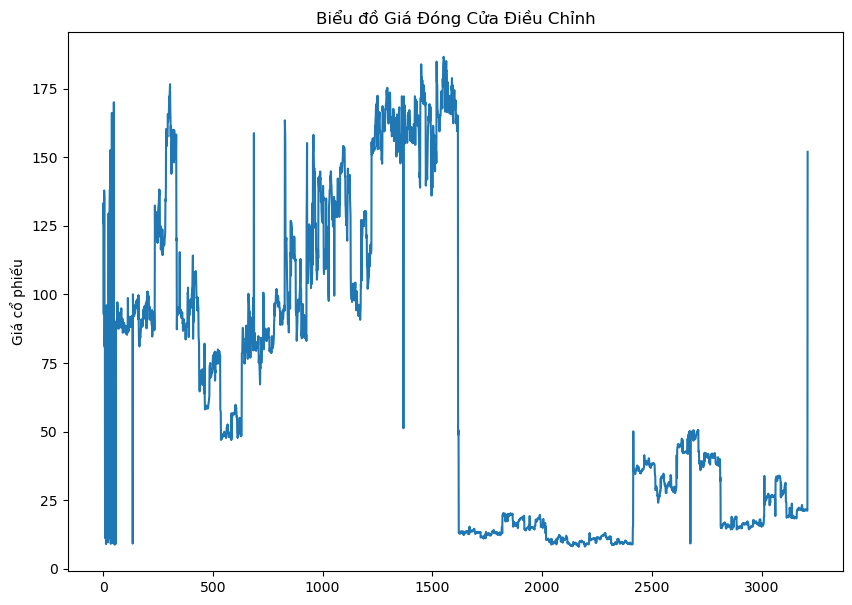

In [20]:
# Đồ thị này thể hiện các giá trị Giá Đóng Điều Chỉnh tăng và giảm.
plt.figure(figsize=(10, 7))
plt.plot(list(AMZN_11_23['adjusted_close'].value_counts().keys()))
plt.ylabel("Giá cổ phiếu")
plt.title("Biểu đồ Giá Đóng Cửa Điều Chỉnh")
plt.show()

<AxesSubplot:ylabel='high'>

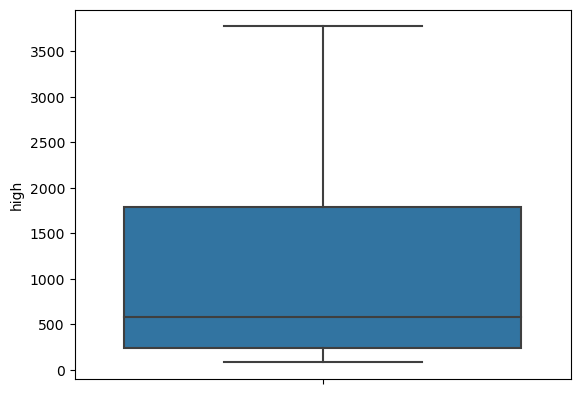

In [21]:
sns.boxplot(y="high", data=AMZN_11_23)

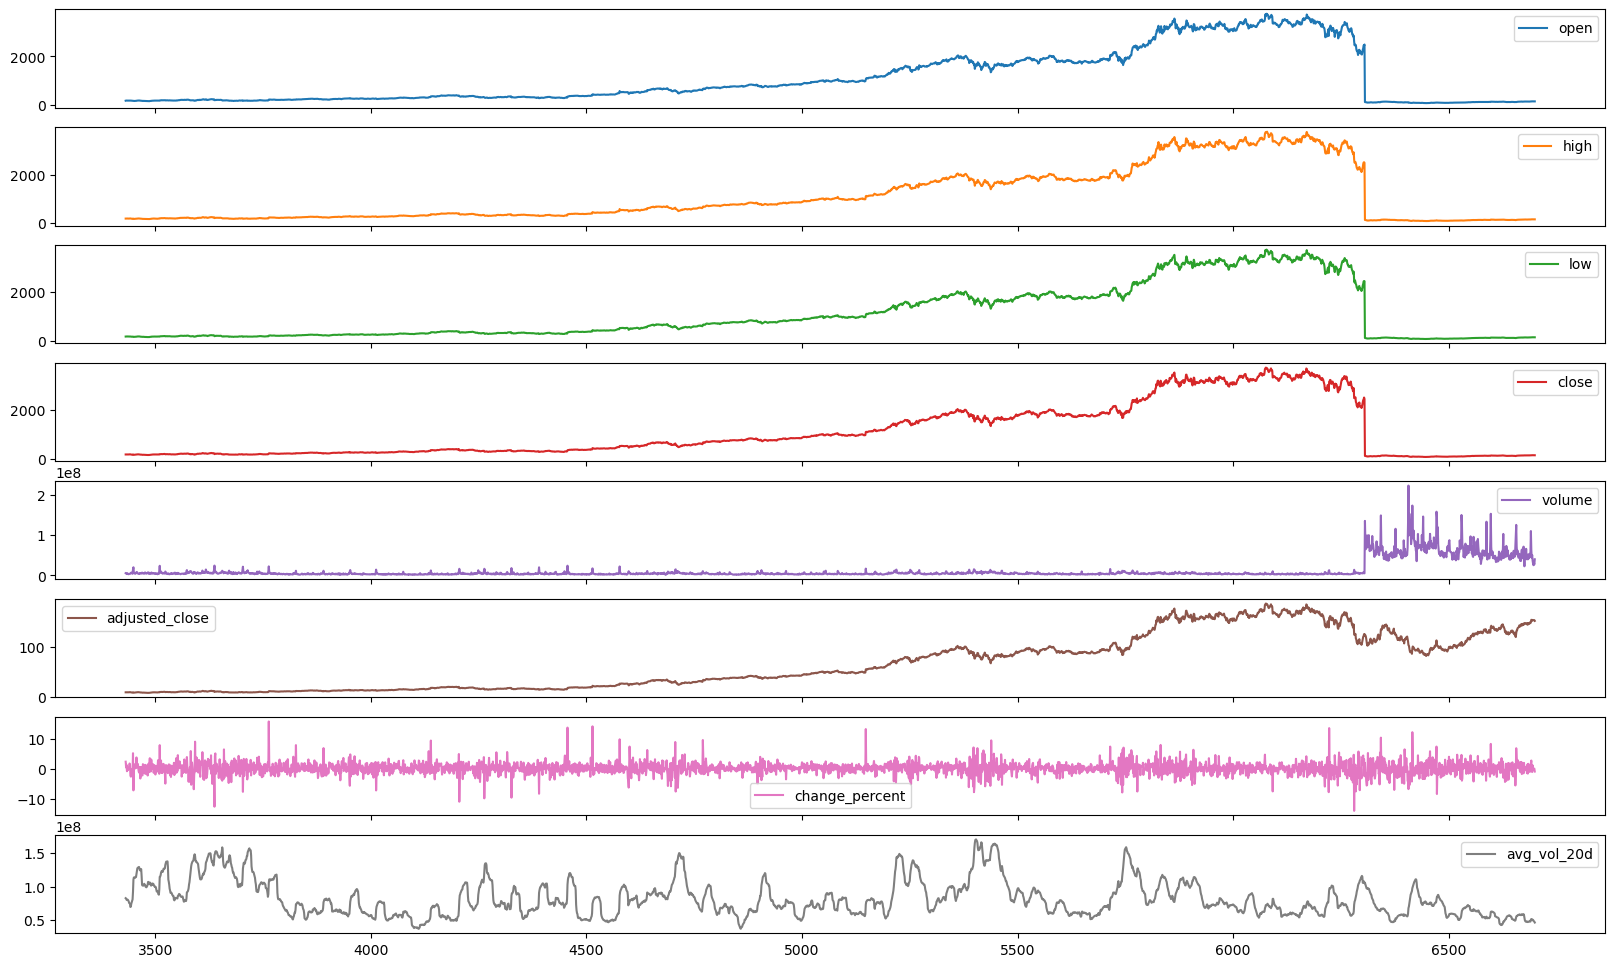

In [22]:
#Thể hiện sự tăng trưởng của từng cột
AMZN_11_23.plot(subplots=True, figsize=(20,12))
plt.show()

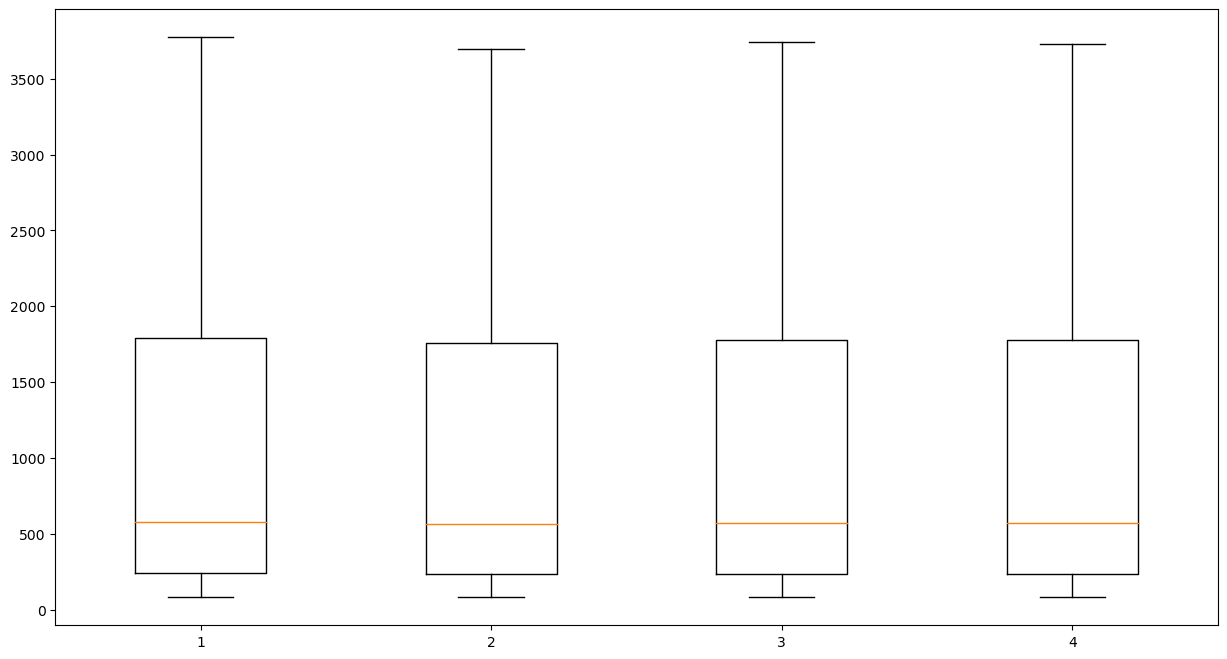

In [23]:
box_data = AMZN_11_23[['high', 'low', 'open', 'close']]

plt.figure(figsize=(15,8))
plt.boxplot(box_data)
plt.show()

In [24]:
a = AMZN_11_23['open'][10390:10409]
b = AMZN_11_23['close'][10390:10409]

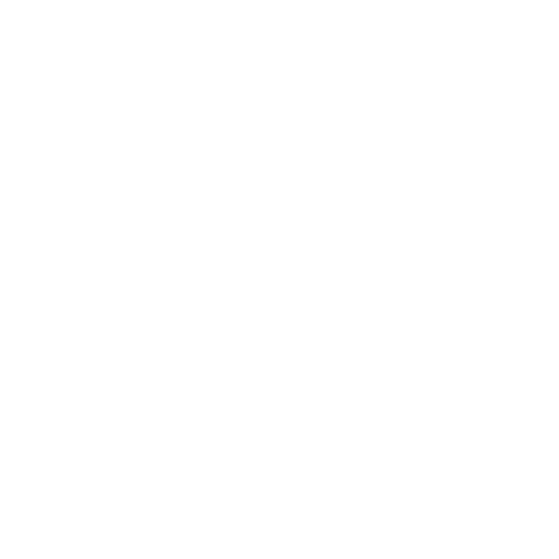

In [25]:
# Đây đang được hiển thị dưới dạng phần trăm.
plt.figure(figsize=(10, 7))
plt.pie((a.value_counts().keys()), (b.value_counts()), autopct='%0.2f%%')
plt.show()

**Statistical Methods**

In [26]:
# tóm tắt số liệu thống kê 
AMZN_11_23.describe()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
count,3270.000000,3270.000000,3270.000000,3270.000000,3.270000e+03,3270.000000,3270.000000,3.270000e+03
mean,1083.267887,1095.098771,1069.966144,1082.750187,1.131993e+07,67.692118,0.108083,8.173509e+07
std,1077.118316,1089.350512,1063.170890,1076.078333,2.111966e+07,54.466231,2.082699,2.621213e+07
min,82.800000,83.480000,81.430000,81.820000,8.813000e+05,8.048500,-14.050000,3.720310e+07
25%,237.262500,240.575000,234.017500,237.715000,2.867475e+06,16.113000,-0.897500,6.174545e+07
50%,570.880000,579.125000,562.890000,572.460000,3.918200e+06,48.394750,0.100000,7.541455e+07
75%,1775.665000,1792.820000,1757.037500,1776.567500,5.930950e+06,105.107500,1.180000,9.657115e+07
max,3744.000000,3773.080000,3696.790000,3731.410000,2.231334e+08,186.570500,15.750000,1.701182e+08


In [27]:
AMZN_11_23.rolling(7).mean().head(20)

C:\Users\FPT SHOP\AppData\Local\Temp\ipykernel_2500\3528654545.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  AMZN_11_23.rolling(7).mean().head(20)


,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
3431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3437,185.208571,186.900000,183.395714,185.288571,4.053357e+06,9.264429,0.345714,8.078024e+07
3438,185.778571,186.811429,183.694286,185.268571,3.674457e+06,9.263429,-0.008571,8.010227e+07
3439,185.414286,186.632857,183.655714,185.342857,3.436628e+06,9.267143,0.042857,7.916414e+07
3440,185.614286,186.845714,183.777143,185.532857,3.471486e+06,9.276643,0.105714,7.839739e+07


C:\Users\FPT SHOP\AppData\Local\Temp\ipykernel_2500\4003796438.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  AMZN_11_23.rolling(window=30).mean()['close'].plot()


<AxesSubplot:>

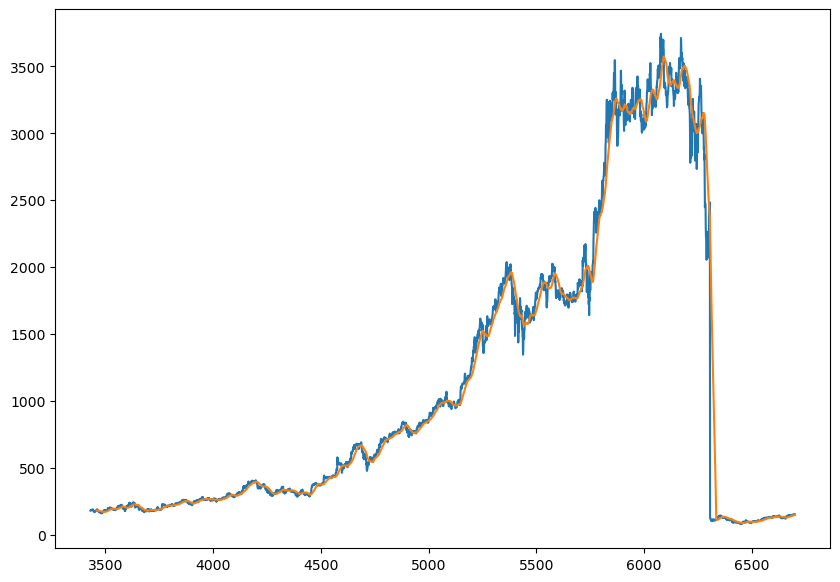

In [28]:
AMZN_11_23['open'].plot(figsize=(10, 7))
AMZN_11_23.rolling(window=30).mean()['close'].plot()

In [29]:
# Sử dụng Phương pháp Max chúng ta tìm Giá trị Tối đa
print("******************************* Hiển thị giá trị tối đa ********************************")
print(AMZN_11_23['open'].max(),"||", AMZN_11_23['close'].max(), "||", AMZN_11_23['high'].max(), "||", AMZN_11_23['low'].max(), 
      AMZN_11_23['adjusted_close'].max(), "||", AMZN_11_23['volume'].max())

******************************* Hiển thị giá trị tối đa ********************************
3744.0 || 3731.41 || 3773.08 || 3696.79 186.5705 || 223133400


In [30]:
# Sử dụng Phương pháp tối thiểu, chúng tôi tìm thấy Giá trị tối thiểu

print("******************************* Hiển thị giá trị tối thiểu ********************************")
print(AMZN_11_23['open'].min(),"||", AMZN_11_23['close'].min(), "||", AMZN_11_23['high'].min(), "||", AMZN_11_23['low'].min(), 
      AMZN_11_23['adjusted_close'].min(), "||", AMZN_11_23['volume'].min())

******************************* Hiển thị giá trị tối thiểu ********************************
82.8 || 81.82 || 83.48 || 81.43 8.0485 || 881300


In [31]:
bl_col = AMZN_11_23.select_dtypes(include=('boolean')).columns
int_col = AMZN_11_23.select_dtypes(include=('int')).columns
str_col = AMZN_11_23.select_dtypes(include=('object')).columns

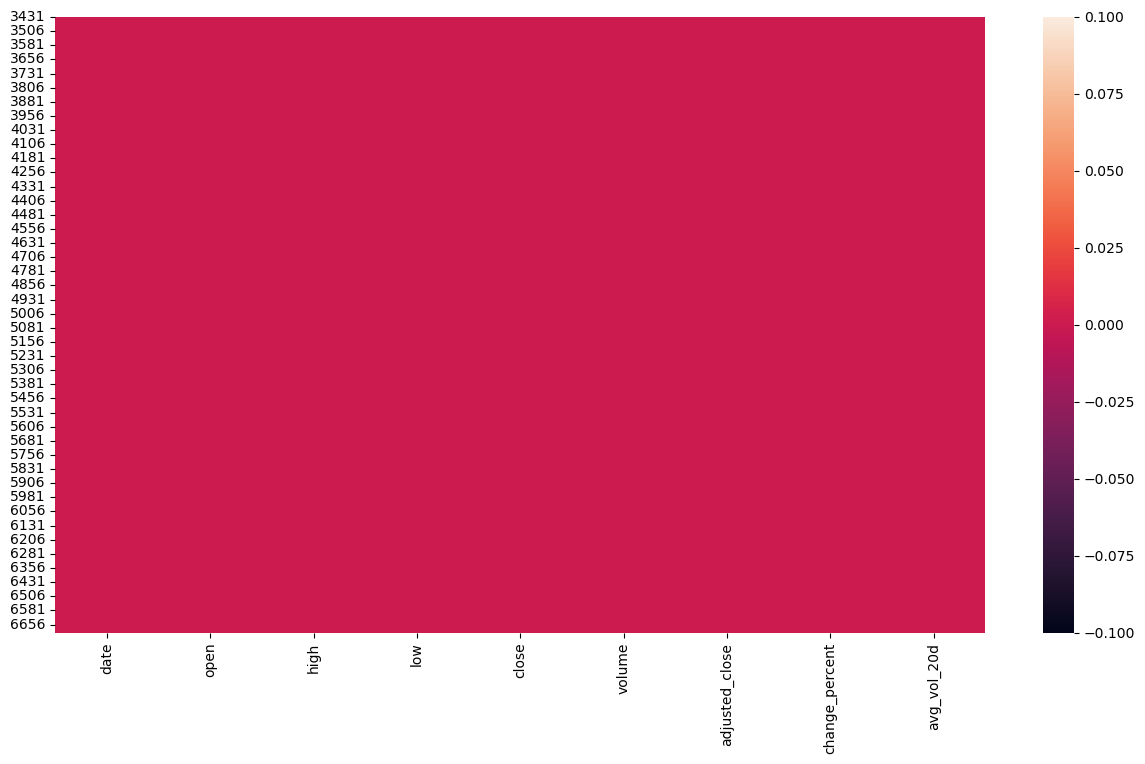

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(AMZN_11_23.isnull())
plt.show()

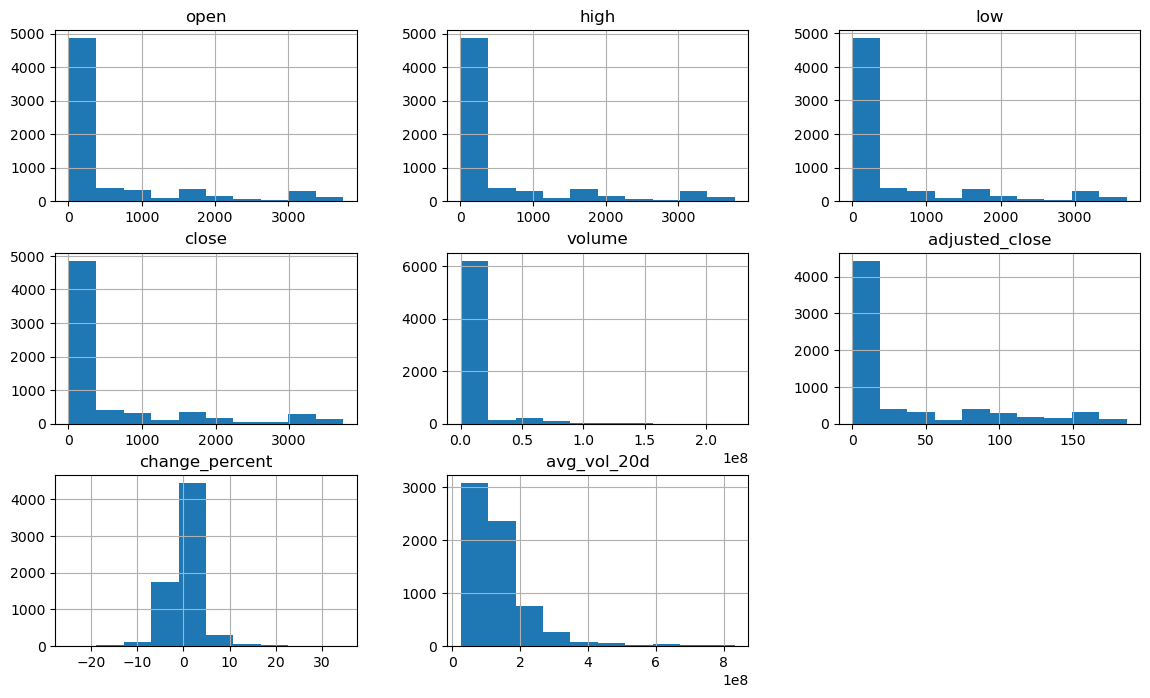

In [33]:
AMZN.hist(figsize=(14, 8))
plt.show()

In [34]:
AMZN_11_23.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'adjusted_close',
       'change_percent', 'avg_vol_20d'],
      dtype='object')

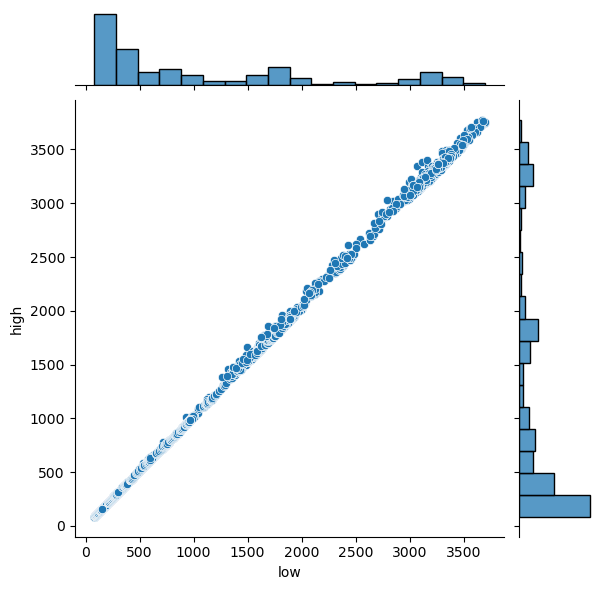

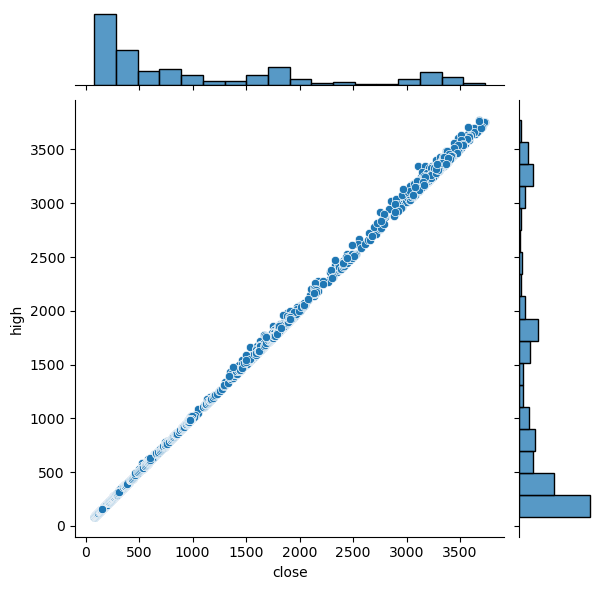

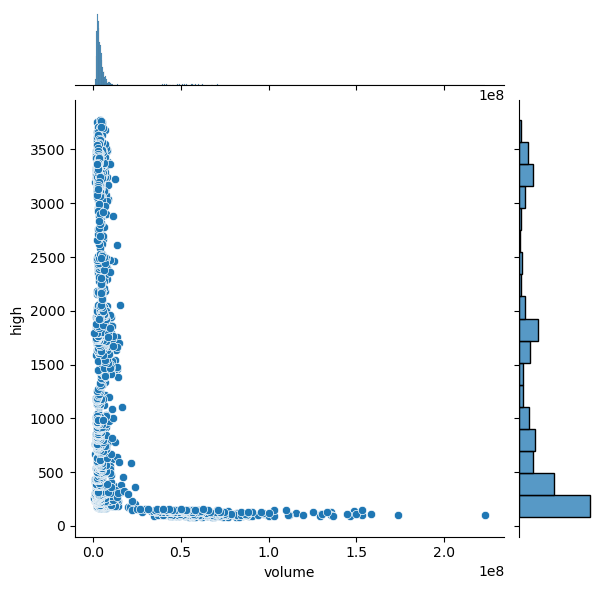

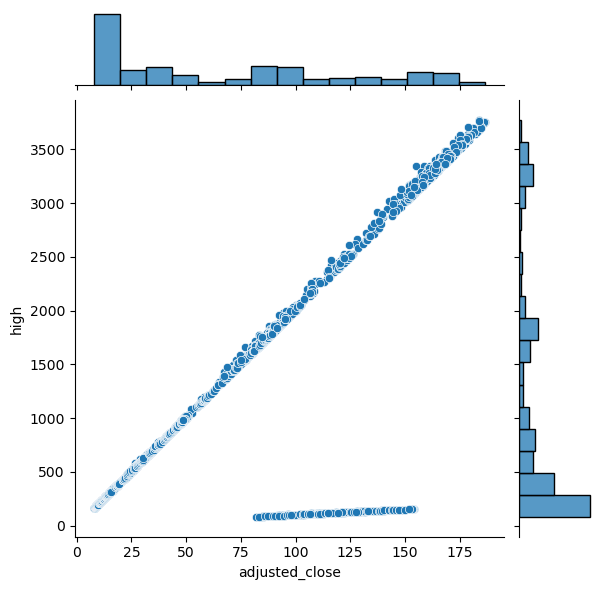

In [35]:
sns.jointplot(data=AMZN_11_23, x='low', y='high')
sns.jointplot(data=AMZN_11_23, x='close', y='high')
sns.jointplot(data=AMZN_11_23, x='volume', y='high')
sns.jointplot(data=AMZN_11_23, x='adjusted_close', y='high')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


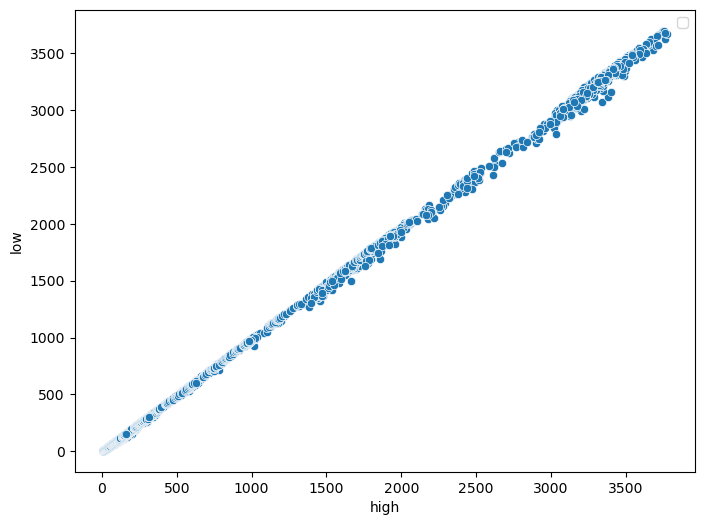

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='high', y='low', data=AMZN)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


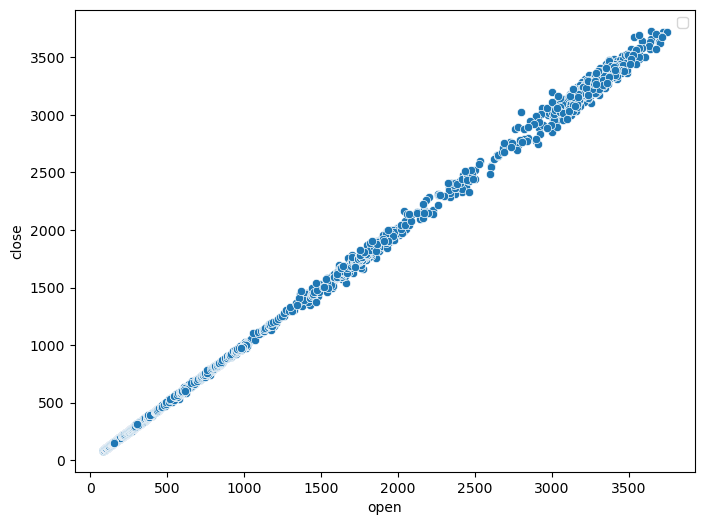

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='open', y='close', data=AMZN_11_23)
plt.legend()
plt.show()